In [1]:
from zs6d import ZS6D
import os
import json



# Loading the config file:
with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop.json"), "r") as f:
    config = json.load(f)
    
# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'])

Using cache found in C:\Users\nidul/.cache\torch\hub\facebookresearch_dino_main
100%|██████████| 21/21 [03:55<00:00, 11.22s/it]


In [2]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)
    
# print(data_gt)

running k-means on cuda..


[running kmeans]: 5it [00:33,  6.77s/it, center_shift=0.000000, iteration=5, tol=0.000100] 


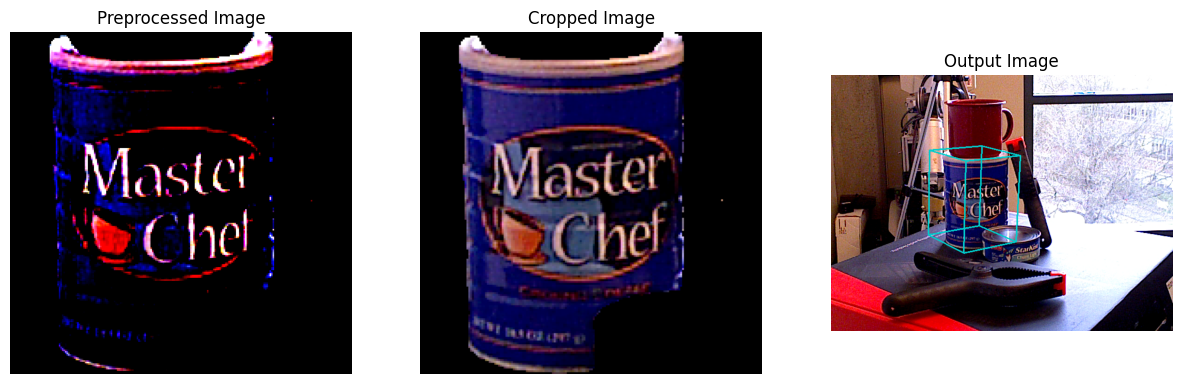

Pose estimation time: 114.61200475692749
R_est: [[-0.79177747  0.6095355   0.03943243]
 [ 0.12369697  0.22323083 -0.96688524]
 [-0.59815341 -0.76068027 -0.25214683]]
t_est: [-39.86364471 -10.69501228 909.48645756]
running k-means on cuda..


[running kmeans]: 9it [00:32,  3.59s/it, center_shift=0.000000, iteration=9, tol=0.000100] 


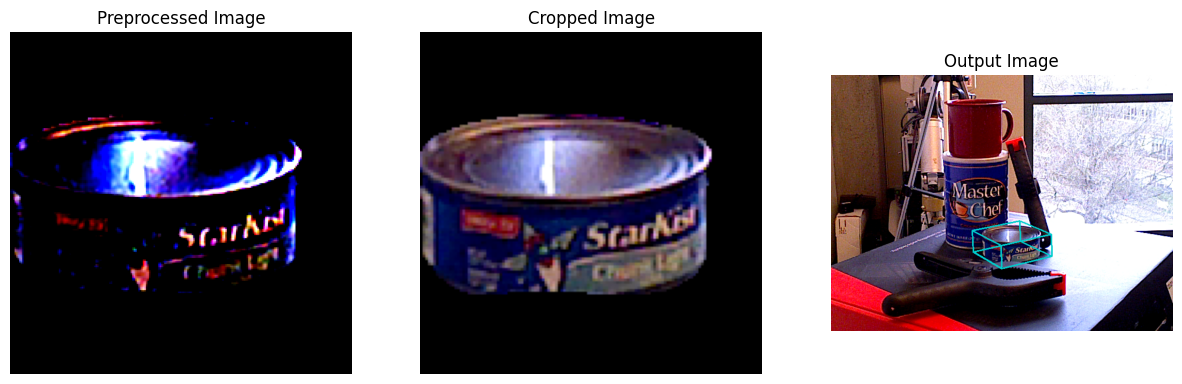

Pose estimation time: 48.38646340370178
R_est: [[-0.86268707  0.50446411 -0.0358745 ]
 [ 0.15603777  0.19802419 -0.96769759]
 [-0.48106469 -0.84041798 -0.24954836]]
t_est: [ 19.78852566  59.62384585 850.22723514]
running k-means on cuda..


[running kmeans]: 5it [00:30,  6.18s/it, center_shift=0.000000, iteration=5, tol=0.000100] 


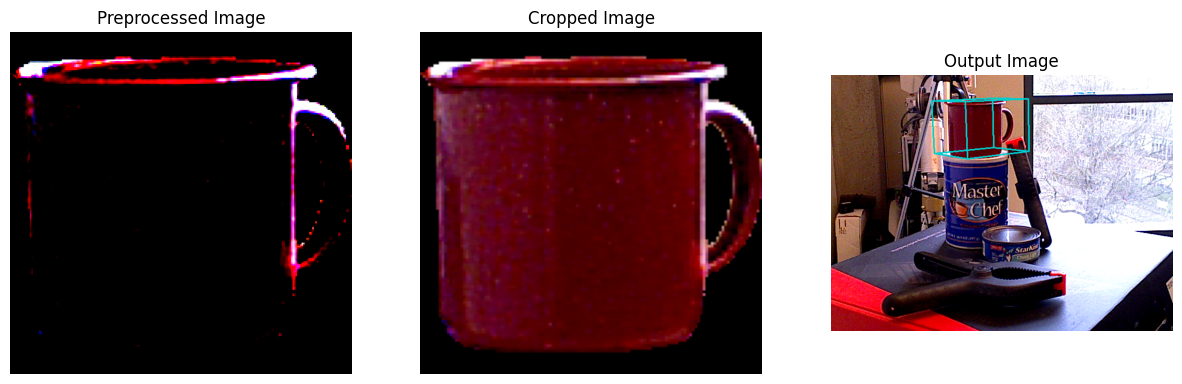

Pose estimation time: 125.53512358665466
R_est: [[ 0.79724881 -0.60312643 -0.02515631]
 [-0.14116689 -0.14576077 -0.97919646]
 [ 0.58691246  0.78421445 -0.20134909]]
t_est: [ -27.25244227 -119.27187216  888.74507686]
running k-means on cuda..


[running kmeans]: 1it [00:00, 23.26it/s, center_shift=0.000000, iteration=1, tol=0.000100]


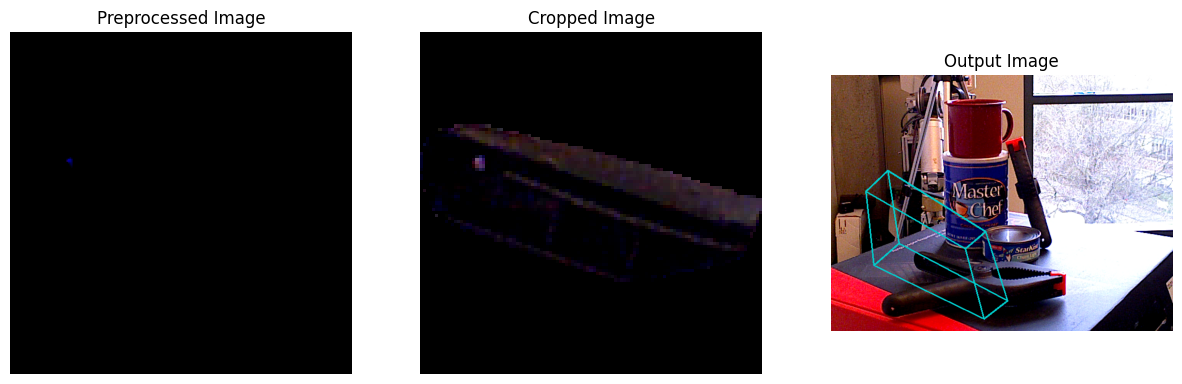

Pose estimation time: 10.273581504821777
R_est: [[-0.2341126  -0.65185274  0.72130389]
 [-0.65154954 -0.44546102 -0.61404208]
 [ 0.72157778 -0.6137202  -0.32042632]]
t_est: [-72.98875728  51.55532913 680.341345  ]
running k-means on cuda..


[running kmeans]: 1it [00:00, 249.88it/s, center_shift=0.000000, iteration=1, tol=0.000100]


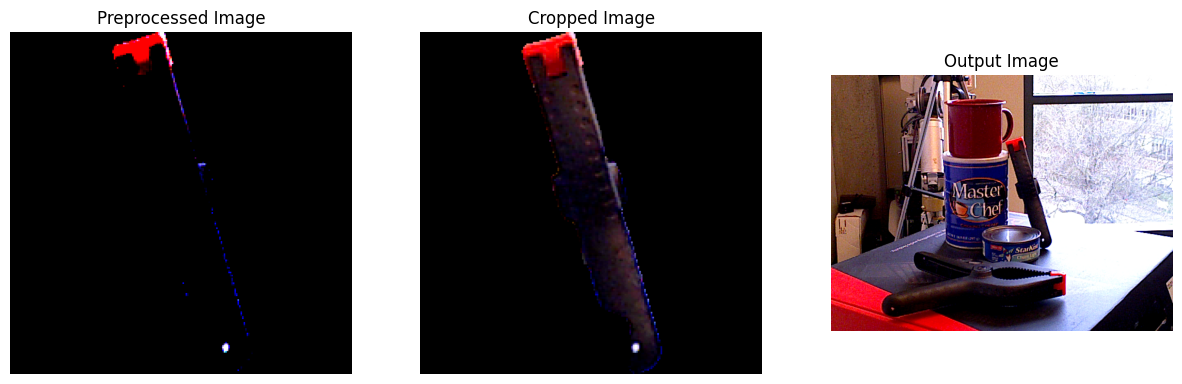

Pose estimation time: 1.663877010345459
R_est: [[ 0.99993897 -0.00778174  0.00784277]
 [ 0.00784278  0.99993897 -0.00778175]
 [-0.00778174  0.00784278  0.99993897]]
t_est: [0.00e+000 1.26e-321 0.00e+000]


In [3]:
img_id = '000048_1'
# img_id = '8'



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est, prep_img,crop_img  = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(prep_img)
    axes[0].set_title('Preprocessed Image')
    axes[1].imshow(crop_img)
    axes[1].set_title('Cropped Image')
    axes[2].imshow(out_img)
    axes[2].set_title('Output Image')
    for ax in axes:
        ax.axis('off')
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")




[  42.32000524   -2.65127514 1008.50386359]
running k-means on cuda..


[running kmeans]: 3it [00:00,  4.19it/s, center_shift=0.000000, iteration=3, tol=0.000100] 


[  36.52407563   -6.33584147 1020.29513426]


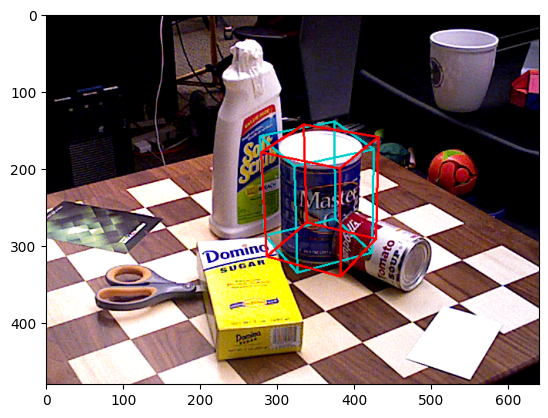

Pose estimation time: 10.96620774269104
R_est: [[-0.40743851 -0.91263907 -0.03292089]
 [-0.39660521  0.20930209 -0.89381035]
 [ 0.82261666 -0.35111617 -0.44723514]]
t_est: [  36.52407563   -6.33584147 1020.29513426]
[-46.42128277 102.82898253 903.87496017]
running k-means on cuda..


[running kmeans]: 7it [00:00, 24.54it/s, center_shift=0.000000, iteration=7, tol=0.000100]


[-47.09127152 102.45062931 920.40432085]


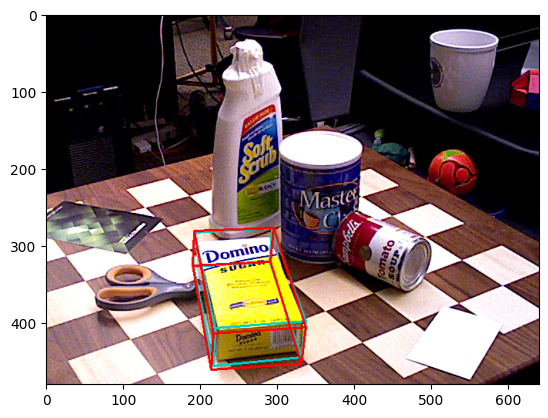

Pose estimation time: 1.974884033203125
R_est: [[ 0.07588234  0.97432762 -0.21196122]
 [-0.85805158 -0.04447743 -0.51163389]
 [-0.50792652  0.22069764  0.8326483 ]]
t_est: [-47.09127152 102.45062931 920.40432085]
[109.81571544  57.76907968 959.07387187]
running k-means on cuda..


[running kmeans]: 1it [00:00, 199.94it/s, center_shift=0.000000, iteration=1, tol=0.000100]

[0. 0. 0.]


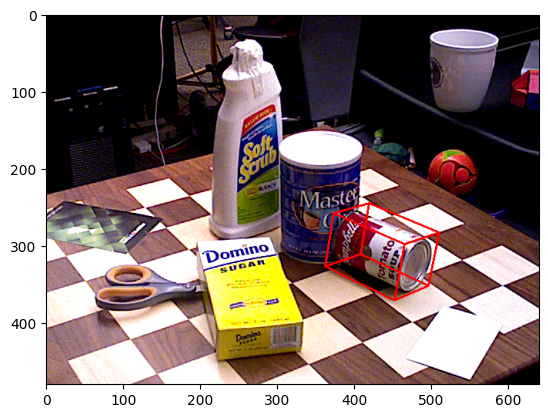

Pose estimation time: 1.5195262432098389
R_est: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
t_est: [0. 0. 0.]
[ -51.17731683  -76.18756283 1029.7130431 ]
running k-means on cuda..


[running kmeans]: 6it [00:00, 29.27it/s, center_shift=0.000000, iteration=6, tol=0.000100]


[ -55.04432903  -79.64010669 1021.09386886]


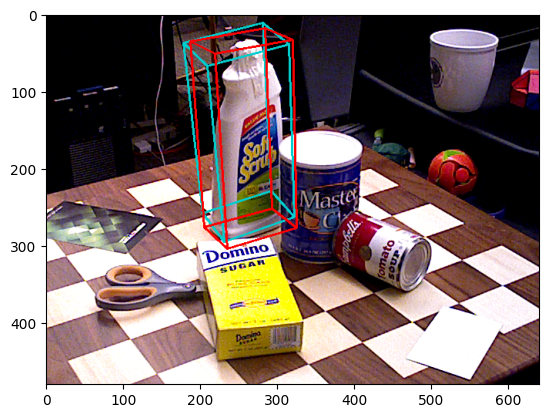

Pose estimation time: 17.602510690689087
R_est: [[ 0.88312754 -0.46830435 -0.02787087]
 [-0.30143038 -0.52090743 -0.7986208 ]
 [ 0.35947945  0.71368514 -0.60118885]]
t_est: [ -55.04432903  -79.64010669 1021.09386886]
[-123.10773748   95.08070802  951.34319177]
running k-means on cuda..


[running kmeans]: 2it [00:00, 42.56it/s, center_shift=0.000000, iteration=2, tol=0.000100]

[-136.33976329   99.3727295  1025.85787655]


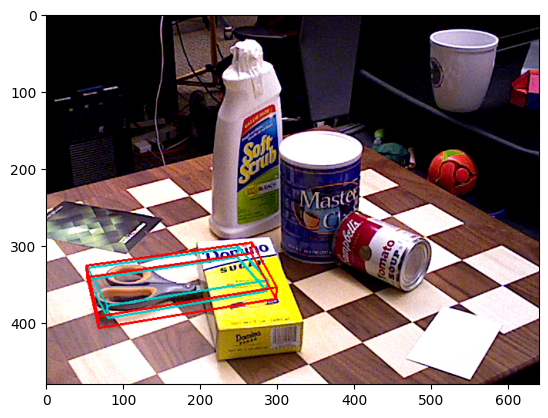

Pose estimation time: 27.131561040878296
R_est: [[ 0.43189531  0.89865585  0.07670793]
 [ 0.38380479 -0.10615847 -0.91729181]
 [-0.81618645  0.4256149  -0.39075777]]
t_est: [-136.33976329   99.3727295  1025.85787655]


In [4]:
img_id = '000051_1'
# img_id = '8'

for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']
    
    cam_rot = np.array(data_gt[img_id][obj_number]['cam_R_m2c']).reshape((3, 3))
    cam_t = np.array(data_gt[img_id][obj_number]['cam_t_m2c'])
    
    print(cam_t)
    
    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask) # this gives a 2D binary numpy array where '1's represent the object
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est, prep_img,crop_img = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)
    print(t_est)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    out_img = vis_utils.draw_3D_bbox_on_image(np.array(out_img), cam_rot, cam_t, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0,colEst=(255,0,0))

    plt.imshow(out_img)
    plt.show()
    
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")

./test/000052/rgb/000001.png
D:/ACCA sem 5/Machine Vision/Project/New Code/Vision_Project/test
D:/ACCA sem 5/Machine Vision/Project/New Code/Vision_Project/test\test/000052/rgb/000001.png
running k-means on cuda..


[running kmeans]: 3it [00:00, 36.10it/s, center_shift=0.000000, iteration=3, tol=0.000100]


Pose estimation time: 13.534322023391724
R_est: [[ 0.60541799  0.78325238  0.14136748]
 [ 0.55523955 -0.28837703 -0.78009469]
 [-0.57024389  0.55077618 -0.60948134]]
t_est: [ 63.66951196  75.15660788 894.38263356]
running k-means on cuda..


[running kmeans]: 5it [00:00, 18.02it/s, center_shift=0.000000, iteration=5, tol=0.000100]


Pose estimation time: 2.038421630859375
R_est: [[-0.32151779 -0.93470297  0.15151455]
 [-0.59953562  0.07709497 -0.79662626]
 [ 0.73292793 -0.34696789 -0.58517513]]
t_est: [-35.80223309 120.8962003  953.28303546]
running k-means on cuda..


[running kmeans]: 2it [00:00, 41.53it/s, center_shift=0.000000, iteration=2, tol=0.000100]

Pose estimation time: 18.005048513412476


R_est: [[ 0.32666584  0.93505887  0.13767476]
 [ 0.69019635 -0.13649125 -0.71063291]
 [-0.64569221  0.32716212 -0.68996125]]
t_est: [ 13.45402829 -18.09460929 913.22333985]


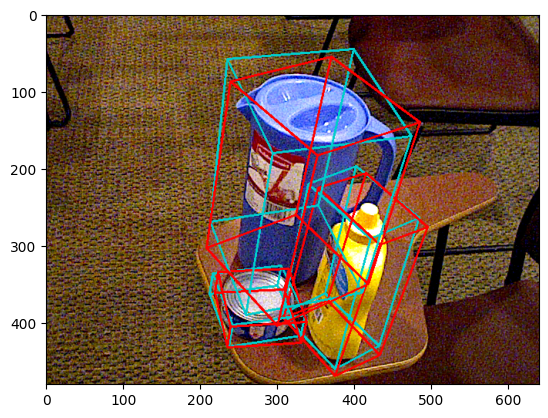

In [5]:

img_id = '000052_1'
# img_id = '8'

print(data_gt[img_id][0]['img_name'])
print(config['dataset_path'])

img_path = os.path.join(config['dataset_path'], data_gt[img_id][0]['img_name'].split("./")[-1])
print(img_path)
img = Image.open(img_path)

for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    cam_rot = np.array(data_gt[img_id][obj_number]['cam_R_m2c']).reshape((3, 3))
    cam_t = np.array(data_gt[img_id][obj_number]['cam_t_m2c'])

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est, prep_img,crop_img = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(out_img), cam_rot, cam_t, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0,colEst=(255,0,0))
    img = out_img
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")
plt.imshow(out_img)
plt.show()


In [6]:
# calculates precision for 1:1:100 dataset with 50tp,20fp, 99tp,51fp
from sklearn.metrics import precision_score
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg
# define predictions
pred_pos1 = [0 for _ in range(50)] + [1 for _ in range(50)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(20)] + [2 for _ in range(51)] + [0 for _ in range(9929)]
y_pred = pred_pos1 + pred_pos2 + pred_neg
# calculate prediction

print(y_true)
print(y_pred)

precision = precision_score(y_true, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 